# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hernadhif Rafif Wiryawan
- **Email:** hernadhif.rawir@gmail.com
- **ID Dicoding:** hernadhif

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 (Seberapa bepengaruh cuaca terhadap tingkat rentalan?) 
- Pertanyaan 2 (Bagaimana hari libur (weekend, holidays) berpengaruh dengan rental pada kategori casual dan registered?) 
- Pertanyaan 3 (Jam berapakah tingkat rentalan paling tinggi?)

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### `day_df` datas

In [3]:
day_df = pd.read_csv('data/data-1.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### `hour_df` datas

In [4]:
hour_df = pd.read_csv('data/data-2.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data `day_df` berisikan total perentalan (casual dan registered) pada hari itu, data ini juga berisi musim, cuaca, temperatur, kelembapan, serta kecepatan angin

- Data `hour_df` berisikan total perentalan (casual dan registered) pada hari itu yang dipecah tiap jamnya, data ini juga berisi musim, cuaca, temperatur, kelembapan, serta kecepatan angin

- Karakteristik data: </br>
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### Assessing Data

#### Menilai tabel `day_df`

In [5]:
# Memeriksa informasi dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Memeriksa missing value
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Memeriksa duplikasi data
print("Banyak duplikasi: ",day_df.duplicated().sum())

Banyak duplikasi:  0


In [8]:
# Menampilkan deskripsi dataset
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
# Menampilkan unique value dari dataset
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [10]:
# Menampilkan deskripsi dataset
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ditemukan data kosong maupun data yang terduplikasi, sehingga tidak perlu dilakukan proses cleaning data 
- Ditemukan format tanggal yang masih salah

#### Menilai tabel `hour_df`

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Banyak duplikasi: ",hour_df.duplicated().sum())

Banyak duplikasi:  0


In [14]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [15]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan data kosong maupun data yang terduplikasi, sehingga tidak perlu dilakukan proses cleaning data 
- Ditemukan format tanggal yang masih salah

### Cleaning Data

#### Membersihkan `day_df`

In [17]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
print("Banyak duplikasi: ",day_df.duplicated().sum())

Banyak duplikasi:  0


In [19]:
# Merubah tipe data kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [20]:
# Mengubahkah musim, tahun, bulan, hari libur, hari kerja, hari libur, hari kerja, kolom ke tipe data kategorikal
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
yr_map = {0: '2011', 1: '2012'}
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
             6: 'June', 7: 'July', 8: 'August', 9: 'September', 
             10: 'October', 11: 'November', 12: 'December'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
               4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
holiday_map = {0: 'No Holiday', 1: 'Holiday'}
workingday_map = {0: 'Non-working day', 1: 'Working day'}
weather_map = {
    1: 'Clear', # (Clear, Few clouds, Partly cloudy)
    2: 'Cloudy/Mist', # (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
    3: 'Light Snow/Rain', # (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    4: 'Heavy Snow/Rain' # (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
}

# Mengaplikasukan mapping 
day_df['season'] = day_df['season'].map(season_map)
day_df['yr'] = day_df['yr'].map(yr_map)
day_df['mnth'] = day_df['mnth'].map(month_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)
day_df['holiday'] = day_df['holiday'].map(holiday_map)
day_df['workingday'] = day_df['workingday'].map(workingday_map)
day_df['weathersit'] = day_df['weathersit'].map(weather_map)

In [21]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,No Holiday,Saturday,Non-working day,Cloudy/Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No Holiday,Sunday,Non-working day,Cloudy/Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No Holiday,Monday,Working day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No Holiday,Tuesday,Working day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No Holiday,Wednesday,Working day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Dilakukan perubahan format pada dtedat menjadi format tanggal
- Mengubahkah season, yr, mnth, holiday, weekday, workingday, weathersit, kolom ke tipe data kategorikal

#### Membersihkan `hour_df`

In [23]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [24]:
print("Banyak duplikasi: ",hour_df.duplicated().sum())

Banyak duplikasi:  0


In [25]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [26]:
# Mengubahkah musim, tahun, bulan, hari libur, hari kerja, hari libur, hari kerja, kolom ke tipe data kategorikal
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
yr_map = {0: '2011', 1: '2012'}
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
             6: 'June', 7: 'July', 8: 'August', 9: 'September', 
             10: 'October', 11: 'November', 12: 'December'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
               4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
holiday_map = {0: 'No Holiday', 1: 'Holiday'}
workingday_map = {0: 'Non-working day', 1: 'Working day'}
weather_map = {
    1: 'Clear', # (Clear, Few clouds, Partly cloudy)
    2: 'Cloudy/Mist', # (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
    3: 'Light Snow/Rain', # (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    4: 'Heavy Snow/Rain' # (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
}

# Mengaplikasukan mapping 
hour_df['season'] = hour_df['season'].map(season_map)
hour_df['yr'] = hour_df['yr'].map(yr_map)
hour_df['mnth'] = hour_df['mnth'].map(month_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
hour_df['holiday'] = hour_df['holiday'].map(holiday_map)
hour_df['workingday'] = hour_df['workingday'].map(workingday_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)

In [27]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,No Holiday,Saturday,Non-working day,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No Holiday,Saturday,Non-working day,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No Holiday,Saturday,Non-working day,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No Holiday,Saturday,Non-working day,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No Holiday,Saturday,Non-working day,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Dilakukan perubahan format pada dtedat menjadi format tanggal
- Mengubahkah season, yr, mnth, holiday, weekday, workingday, weathersit, kolom ke tipe data kategorikal

## Exploratory Data Analysis (EDA)

### Explore datasets

In [29]:
# Menampilkan sample data
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
138,139,2011-05-19,Summer,2011,May,No Holiday,Thursday,Working day,Cloudy/Mist,0.530833,0.510742,0.829583,0.108213,735,3840,4575
498,499,2012-05-13,Summer,2012,May,No Holiday,Sunday,Non-working day,Clear,0.612500,0.585238,0.576250,0.225117,2172,3946,6118
480,481,2012-04-25,Summer,2012,April,No Holiday,Wednesday,Working day,Clear,0.476667,0.470317,0.427917,0.118792,655,5541,6196
407,408,2012-02-12,Spring,2012,February,No Holiday,Sunday,Non-working day,Clear,0.127500,0.101658,0.464583,0.409212,73,1456,1529
416,417,2012-02-21,Spring,2012,February,No Holiday,Tuesday,Working day,Clear,0.287826,0.295113,0.594348,0.205717,163,3614,3777


In [30]:
# Menampilkan deskripsi data
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,No Holiday,Saturday,Working day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [31]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8640,8641,2011-12-31,Spring,2011,December,19,No Holiday,Saturday,Non-working day,Clear,0.42,0.4242,0.54,0.2239,19,73,92
8327,8328,2011-12-18,Winter,2011,December,15,No Holiday,Sunday,Non-working day,Clear,0.32,0.3030,0.45,0.2836,23,184,207
17298,17299,2012-12-28,Spring,2012,December,15,No Holiday,Friday,Working day,Cloudy/Mist,0.30,0.3182,0.49,0.0000,74,151,225
14921,14922,2012-09-18,Fall,2012,September,22,No Holiday,Tuesday,Working day,Light Snow/Rain,0.58,0.5455,0.83,0.4627,14,137,151
8786,8787,2012-01-06,Spring,2012,January,22,No Holiday,Friday,Working day,Clear,0.36,0.3485,0.50,0.1940,12,123,135


In [32]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,No Holiday,Saturday,Working day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Explore untuk pertanyaan nomor 1

In [33]:
# Grouping perental pada tiap cuaca
day_df.groupby('weathersit').agg({
    'cnt': 'sum', 
    'casual':['sum' ,'mean'], 
    'registered': ['sum' ,'mean'],
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt  casual             registered             
                     sum     sum        mean        sum         mean
weathersit                                                          
Clear            2257952  446346  964.030238    1811606  3912.755940
Cloudy/Mist       996858  169776  687.352227     827082  3348.510121
Light Snow/Rain    37869    3895  185.476190      33974  1617.809524

### Explore untuk pertanyaan nomor 2

In [34]:
# Grouping banyak perental pada tiap hari
day_df.groupby('weekday').agg({
    'cnt': 'sum', 
    'casual':['sum' ,'mean'], 
    'registered': ['sum' ,'mean'],
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt  casual              registered             
              sum     sum         mean        sum         mean
weekday                                                       
Friday     487790   78238   752.288462     409552  3938.000000
Thursday   485395   61460   590.961538     423935  4076.298077
Saturday   477807  153852  1465.257143     323955  3085.285714
Wednesday  473048   57319   551.144231     415729  3997.394231
Tuesday    469109   57843   556.182692     411266  3954.480769
Monday     455503   70784   674.133333     384719  3663.990476
Sunday     444027  140521  1338.295238     303506  2890.533333

In [35]:
# Grouping banyak perental pada hari kerja dan hari libur
day_df.groupby('workingday').agg({
    'cnt': 'sum', 
    'casual':['sum' ,'mean'], 
    'registered': ['sum' ,'mean'],
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt  casual              registered             
                     sum     sum         mean        sum         mean
workingday                                                           
Working day      2292410  303285   606.570000    1989125  3978.250000
Non-working day  1000269  316732  1371.134199     683537  2959.034632

In [36]:
# Grouping banyak perental pada tiap hari dan hari raya
day_df.groupby(['weekday', 'holiday']).agg({
    'cnt': 'sum', 
    'casual':['sum' ,'mean'], 
    'registered': ['sum' ,'mean'],
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt  casual              registered             
                         sum     sum         mean        sum         mean
weekday   holiday                                                        
Thursday  No Holiday  481475   59945   587.696078     421530  4132.647059
Friday    No Holiday  481296   77156   756.431373     404140  3962.156863
Saturday  No Holiday  477807  153852  1465.257143     323955  3085.285714
Tuesday   No Holiday  468096   57403   557.310680     410693  3987.310680
Wednesday No Holiday  465645   54757   531.621359     410888  3989.203883
Sunday    No Holiday  444027  140521  1338.295238     303506  2890.533333
Monday    No Holiday  395898   54024   600.266667     341874  3798.600000
          Holiday      59605   16760  1117.333333      42845  2856.333333
Wednesday Holiday       7403    2562  2562.000000       4841  4841.000000
Friday    Holiday       6494    1082   541.000000       5412  2706.000000
Thursday  Holiday       3920    1515   757.500000       2405  1202.500000
Tuesday   Holiday       1013     440   440.000000        573   573.000000

In [37]:
# Grouping banyak rental hari kerja, hari libur, dan hari raya
day_df.groupby(['workingday', 'holiday']).agg({
    'cnt': 'sum', 
    'casual': ['sum', 'mean'], 
    'registered': ['sum', 'mean'],
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt  casual              registered  \
                                sum     sum         mean        sum   
workingday      holiday                                               
Working day     No Holiday  2292410  303285   606.570000    1989125   
Non-working day No Holiday   921834  294373  1401.776190     627461   
                Holiday       78435   22359  1064.714286      56076   

                                         
                                   mean  
workingday      holiday                  
Working day     No Holiday  3978.250000  
Non-working day No Holiday  2987.909524  
                Holiday     2670.285714

In [38]:
# Grouping banyak rental hari kerja, hari libur, dan hari raya
rental_by_day_type = day_df.groupby(['workingday', 'holiday']).agg({
    'cnt': ['sum', 'mean', 'count']
}).reset_index()

# Mengubah nama kolom
rental_by_day_type.columns = ['workingday', 'holiday', 'total_cnt', 'avg_cnt', 'day_count']

# Menghitung persentase
total_rentals = rental_by_day_type['total_cnt'].sum()
rental_by_day_type['percentage'] = (rental_by_day_type['total_cnt'] / total_rentals) * 100
rental_by_day_type['percentage'] = rental_by_day_type['percentage'].map(lambda x: f"{x:.2f}%")

print(rental_by_day_type)

        workingday     holiday  total_cnt      avg_cnt  day_count percentage
0  Non-working day     Holiday      78435  3735.000000         21      2.38%
1  Non-working day  No Holiday     921834  4389.685714        210     28.00%
2      Working day  No Holiday    2292410  4584.820000        500     69.62%


### Explore untuk pertanyaan nomor 3

In [39]:
# Grouping berdasarkan jam
hourly_stats = hour_df.groupby('hr').agg({
    'cnt': 'sum', 
    'casual':['sum' ,'mean'], 
    'registered': ['sum' ,'mean'],
}).sort_values(by=('cnt', 'sum'), ascending=False)
hourly_stats

cnt casual            registered            
       sum    sum       mean        sum        mean
hr                                                 
17  336860  54220  74.273973     282640  387.178082
18  309772  44496  61.120879     265276  364.390110
8   261001  15761  21.679505     245240  337.331499
16  227748  53834  73.745205     173914  238.238356
19  226789  35505  48.770604     191284  262.752747
13  184919  52713  72.308642     132206  181.352538
12  184414  49718  68.293956     134696  185.021978
15  183149  54606  74.905350     128543  176.327846
14  175652  55089  75.567901     120563  165.381344
20  164550  26378  36.233516     138172  189.796703
9   159438  22458  30.891334     136980  188.418157
7   154171   8037  11.055021     146134  201.009629
11  151320  43286  59.540578     108034  148.602476
10  126257  33789  46.477304      92468  127.191197
21  125445  20570  28.255495     104875  144.059066
22   95612  16200  22.252747      79412  109.082418
23   63941  11065  15.199176      52876   72.631868
6    55132   3017   4.161379      52115   71.882759
0    39130   7375  10.158402      31755   43.739669
1    24164   4709   6.504144      19455   26.871547
2    16352   3412   4.772028      12940   18.097902
5    14261   1012   1.411437      13249   18.478382
3     8174   1893   2.715925       6281    9.011478
4     4428    874   1.253945       3554    5.098996

In [40]:
# Deskripsi data
hourly_stats.describe()

cnt        casual                registered            
                 sum           sum       mean            sum        mean
count      24.000000     24.000000  24.000000      24.000000   24.000000
mean   137194.958333  25834.041667  35.481185  111360.916667  152.997781
std     95894.380180  20607.335569  28.249635   80842.245321  110.873223
min      4428.000000    874.000000   1.253945    3554.000000    5.098996
25%     51131.500000   6708.500000   9.244838   47025.000000   64.846986
50%    152745.500000  21514.000000  29.573414  114298.500000  156.991910
75%    184540.250000  45801.500000  62.914148  140162.500000  192.599935
max    336860.000000  55089.000000  75.567901  282640.000000  387.178082

**Insight:**
- Ditemukan bahwa tidak ada sama sekali perental ketika cuaca yang deras (Heavy rain, Heavy snow)
- Ditemukan bahwa jam 5 sore (17 PM) adalah jam yang memiliki banyak perental terbesar
- Ditemukan bahwa Musim gugur sebagai musim yang memiliki perental paling banyak
- Perentalan terbanyak terjadi pada working day (hari kerja)
- Ditemukan bahwa hari Jum'at merupakan hari dengan total perental paling besar dibanding hari lainnya
- Hari Kamis merupakan hari dengan perental terbesar untuk kategori registered
- Hari Sabtu merupakan hari dengan perental terbesar untuk kategori casual

## Visualization & Explanatory Analysis

### Seberapa bepengaruh cuaca terhadap tingkat rentalan?

weathersit
Clear              68.57%
Cloudy/Mist        30.27%
Light Snow/Rain     1.15%
Name: cnt, dtype: object


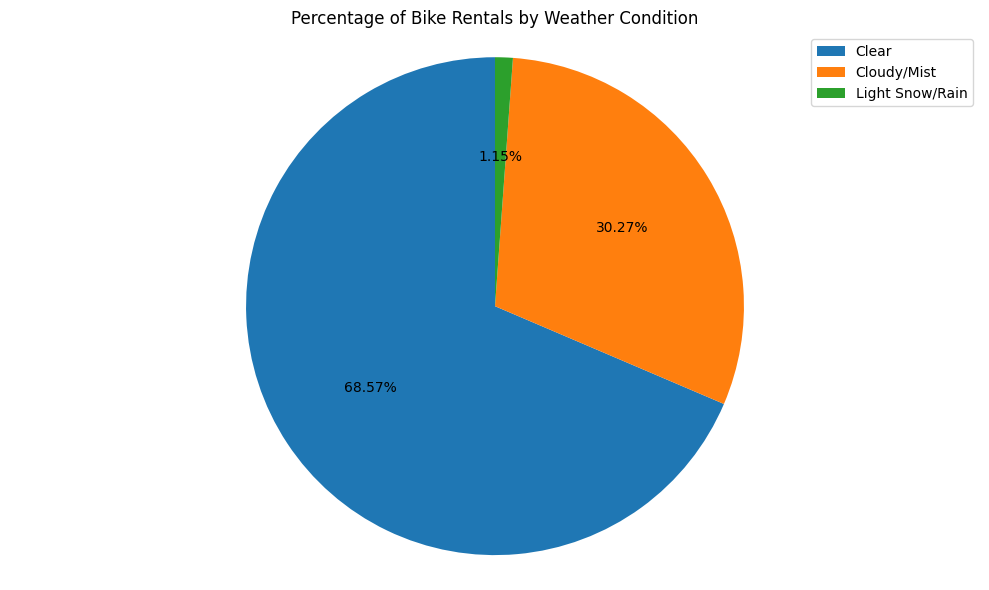

In [41]:
# Grouping untuk kondisi cuaca dan jumlah sewa
rentals_by_weather = day_df.groupby('weathersit')['cnt'].sum()

# Menghitung persentase
percentage_by_weather = (rentals_by_weather / rentals_by_weather.sum()) * 100

# Menampilkan Hasil
print(percentage_by_weather.map(lambda x: f"{x:.2f}%"))

# Menvisualisasikan menggunakan pie chart
plt.figure(figsize=(10, 6))
plt.pie(percentage_by_weather, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Bike Rentals by Weather Condition')
plt.axis('equal')  
plt.legend(percentage_by_weather.index, loc="best")
plt.tight_layout()
plt.show()

weathersit
Clear              2257952
Cloudy/Mist         996858
Light Snow/Rain      37869
Name: cnt, dtype: int64


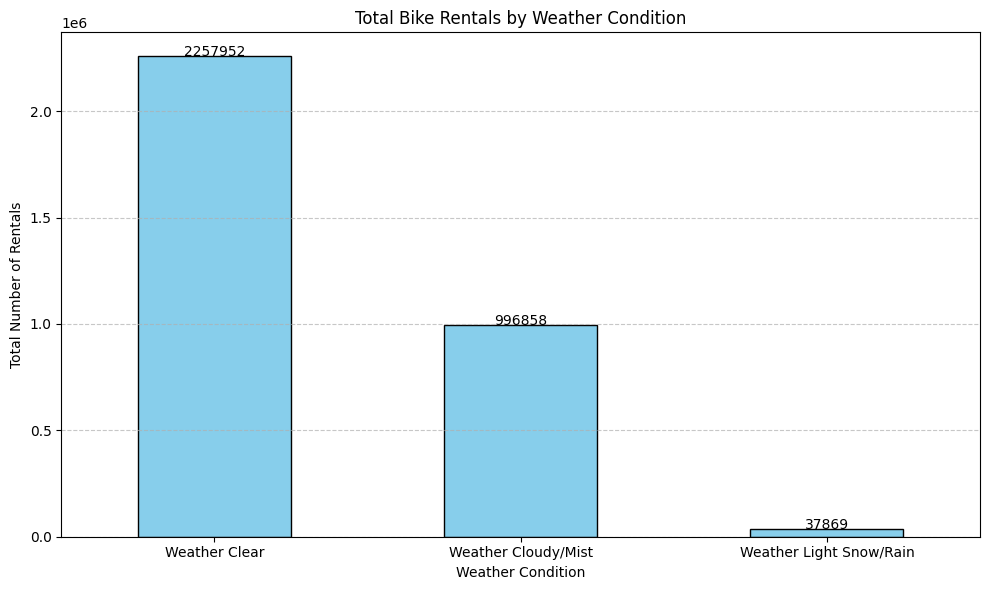

In [42]:
# Grouping untuk kondisi cuaca dan jumlah sewa
total_rentals_by_weather = day_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)

# Menampilkan Hasil
print(total_rentals_by_weather)

# Membuat bar chart
plt.figure(figsize=(10, 6))
total_rentals_by_weather.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan label kondisi cuaca
weather_labels = {
    1: "Clear",
    2: "Mist/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
}

# Mengatur label x-tick ke deskripsi cuaca
plt.xticks(range(len(total_rentals_by_weather)), 
           [weather_labels.get(i, f"Weather {i}") for i in total_rentals_by_weather.index],
           rotation=0)

# Menambah label dan judul
plt.xlabel('Weather Condition')
plt.ylabel('Total Number of Rentals')
plt.title('Total Bike Rentals by Weather Condition')

# Menambah grid line
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label nilai di atas setiap batang
for i, v in enumerate(total_rentals_by_weather):
    plt.text(i, v + 30, f"{v}", ha='center')

plt.tight_layout()
plt.show()

weathersit
Clear              4876.786177
Cloudy/Mist        4035.862348
Light Snow/Rain    1803.285714
Name: cnt, dtype: float64


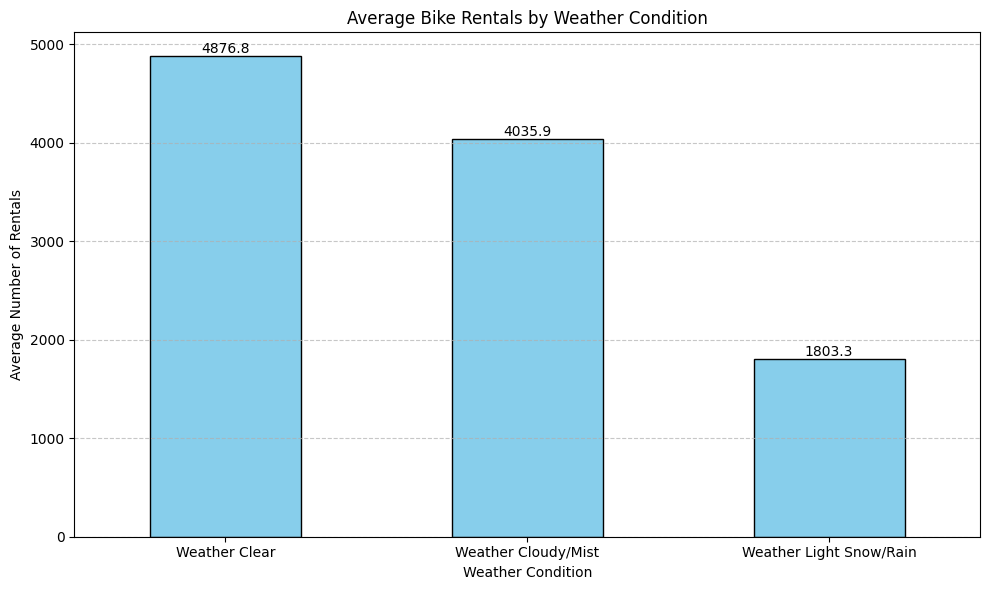

In [43]:
# Grouping untuk kondisi cuaca dan rata-rata perental
avg_rentals_by_weather = day_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)

# Menampilkan Hasil
print(avg_rentals_by_weather)

# Membuat bar chart
plt.figure(figsize=(10, 6))
avg_rentals_by_weather.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan label kondisi cuaca
weather_labels = {
    1: "Clear",
    2: "Mist/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
}

# Mengatur label x-tick ke deskripsi cuaca
plt.xticks(range(len(avg_rentals_by_weather)), 
           [weather_labels.get(i, f"Weather {i}") for i in avg_rentals_by_weather.index],
           rotation=0)

# Menambah label dan judul
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Rentals')
plt.title('Average Bike Rentals by Weather Condition')

# Menambah grid line
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label nilai di atas setiap batang
for i, v in enumerate(avg_rentals_by_weather):
    plt.text(i, v + 30, f"{v:.1f}", ha='center')

plt.tight_layout()
plt.show()

**Insight:**
- 68.57% perentalan terjadi ketika cuaca yang cerah 
- 30.27% perentalan terjadi ketika cuaca Cloudy (Berawan), 
- 1.15% perentalan terjadi ketika cuaca Light Percipatation (light rain/snow)
- Tidak ada perentalan terjadi ketika cuaca Heavy Percipatation (heavy rain/snow)

### Bagaimana hari libur (weekend, holidays) berpengaruh dengan rental pada kategori casual dan registered?

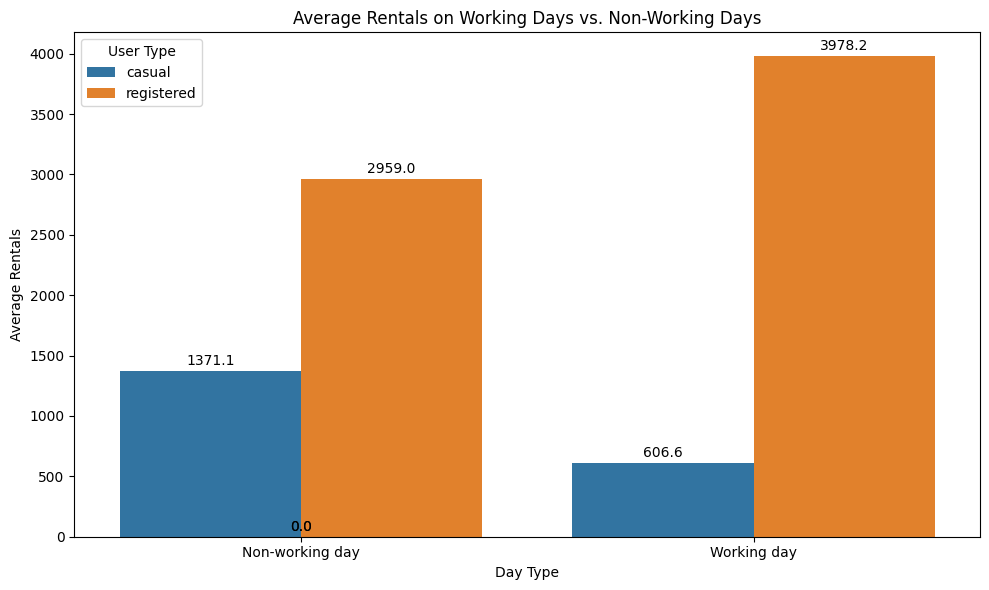

In [44]:
# Grouping rata-rata rental hari kerja dan hari libur
workingday_comparison = day_df.groupby('workingday')[['casual', 'registered', 'cnt']].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
workingday_melted = pd.melt(workingday_comparison, id_vars=['workingday'],
                           value_vars=['casual', 'registered'],
                           var_name='User Type', value_name='Average Rentals')

# Create the barplot
bars = sns.barplot(x='workingday', y='Average Rentals', hue='User Type', data=workingday_melted, ax=ax)

# Menambahkan label nilai di atas setiap batang
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50,
            f'{height:.1f}',
            ha='center')

ax.set_xlabel('Day Type')
ax.set_ylabel('Average Rentals')
ax.set_title('Average Rentals on Working Days vs. Non-Working Days')
plt.tight_layout()
plt.show()

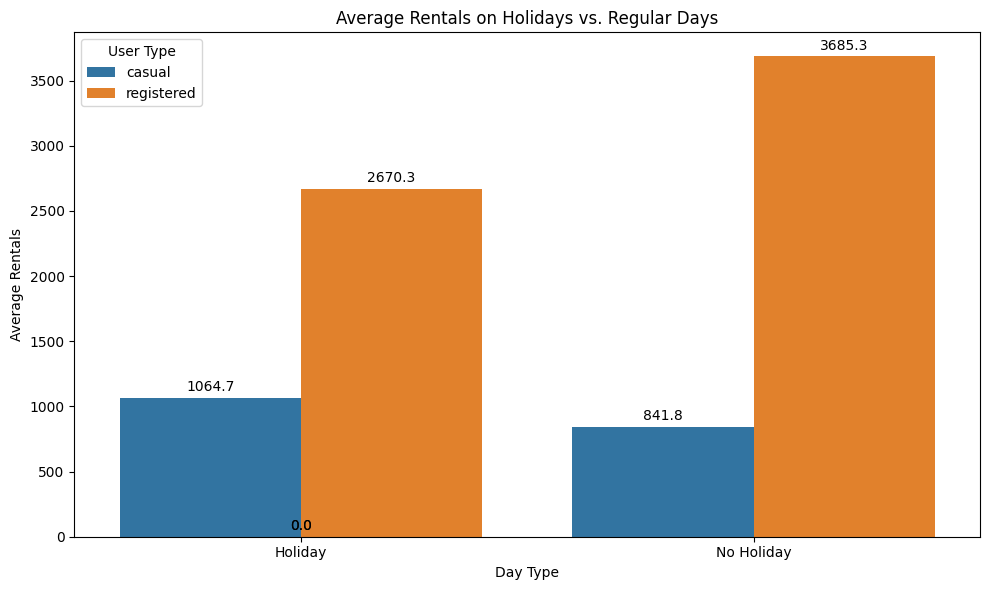

In [45]:
# Grouping rata-rata rental hari biasa dan hari raya
holiday_comparison = day_df.groupby('holiday')[['casual', 'registered', 'cnt']].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
holiday_melted = pd.melt(holiday_comparison, id_vars=['holiday'], 
                        value_vars=['casual', 'registered'], 
                        var_name='User Type', value_name='Average Rentals')

# Create the barplot
bars = sns.barplot(x='holiday', y='Average Rentals', hue='User Type', data=holiday_melted, ax=ax)

# Menambahkan label nilai di atas setiap batang
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50,
            f'{height:.1f}',
            ha='center')

ax.set_xlabel('Day Type')
ax.set_ylabel('Average Rentals')
ax.set_title('Average Rentals on Holidays vs. Regular Days')
plt.tight_layout()
plt.show()

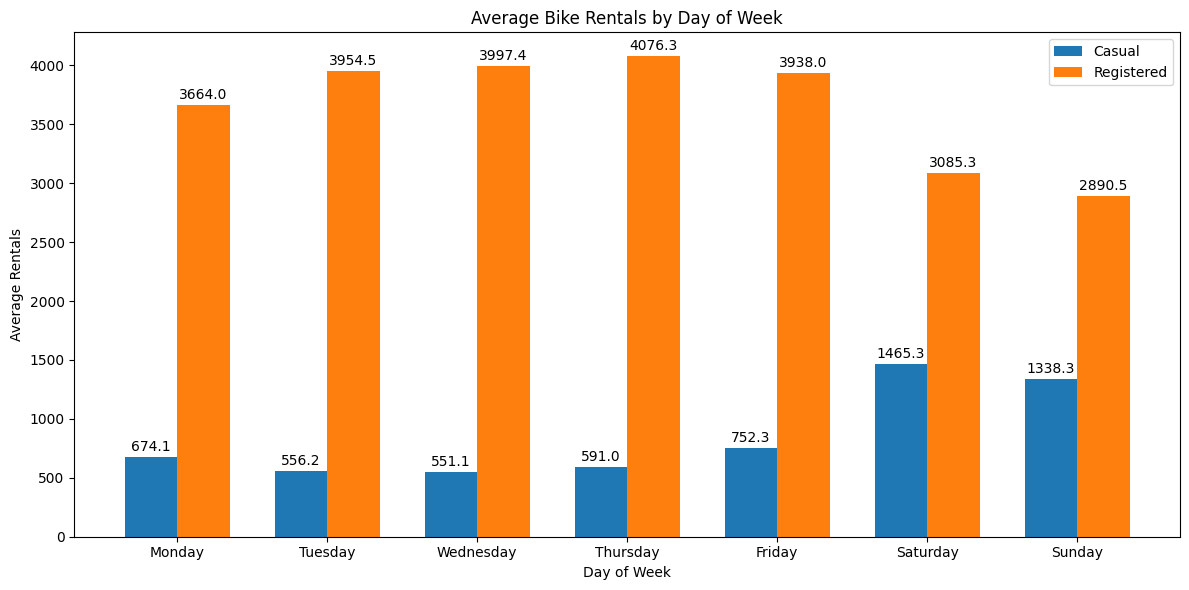

In [46]:
# Grouping total rental hari kerja dan hari libur
weekday_analysis = day_df.groupby('weekday')[['casual', 'registered', 'cnt']].mean().reset_index()

# Menentukan urutan khusus untuk hari dalam seminggu dimulai dari Senin
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#  Merubah tipe data kolom weekday menjadi kategorikal
weekday_analysis['weekday'] = pd.Categorical(weekday_analysis['weekday'], categories=weekday_order, ordered=True)
weekday_analysis = weekday_analysis.sort_values('weekday')

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
x = np.arange(len(weekday_analysis))

casual = ax.bar(x - width/2, weekday_analysis['casual'], width, label='Casual')
registered = ax.bar(x + width/2, weekday_analysis['registered'], width, label='Registered')

# Menaikkan label nilai di atas setiap bar
for bar in casual:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{height:.1f}', ha='center')

for bar in registered:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{height:.1f}', ha='center')

ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Rentals')
ax.set_title('Average Bike Rentals by Day of Week')
ax.set_xticks(x)
ax.set_xticklabels(weekday_analysis['weekday'])
ax.legend()
plt.tight_layout()
plt.show()

**Insight:**
- Perentalan paling sering terjadi pada working day dengan registered sebagai perental terbesar
- Terjadi sedikit penurunan pada weekend pada kategori registered
- Terjadi peningkatan pada weekend pada kategori casual

### Jam berapakah tingkat rentalan paling tinggi?

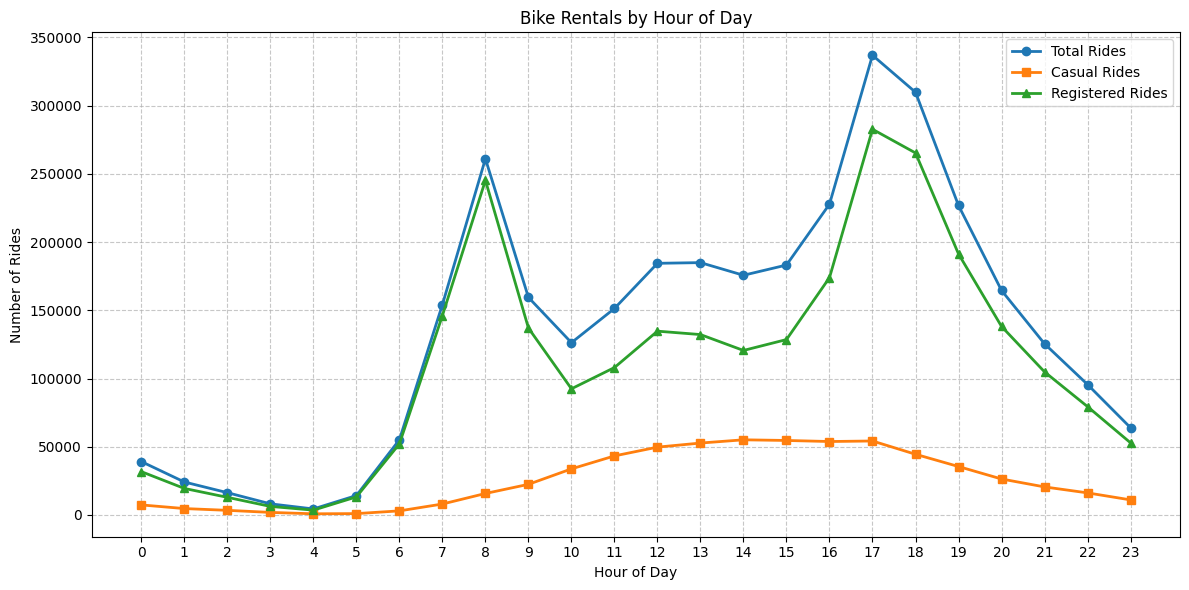

In [47]:
# Mereset index untuk membuat 'hr' menjadi kolom
hourly_stats = hourly_stats.reset_index()

# Mengurutkan berdasarkan jam untuk visualisasi timeline 
hourly_stats = hourly_stats.sort_values(by='hr')

# Mengatur ukuran figure
plt.figure(figsize=(12, 6))

# Plot menggunakan total rental, casual, dan registered berdasarkan jamnya
plt.plot(hourly_stats['hr'], hourly_stats[('cnt', 'sum')], marker='o', linewidth=2, label='Total Rides')
plt.plot(hourly_stats['hr'], hourly_stats[('casual', 'sum')], marker='s', linewidth=2, label='Casual Rides')
plt.plot(hourly_stats['hr'], hourly_stats[('registered', 'sum')], marker='^', linewidth=2, label='Registered Rides')

# Menambahkan label dan judul
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Bike Rentals by Hour of Day')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Pengguna casual mulai meningkat sekitar jam 9 pagi
- Puncak penggunaan ditunjukan pada jam 8 pagi (8 AM) dan juga 3 sore (17 PM)

## Analisis Lanjutan (Opsional)

### Mengelompokkan jam menjadi beberapa kategori (Pagi, Siang, Malam) menggunakan Clustering dengan metode Binning untuk melihat tingkat perentalan sepeda pada tiap kategorinya

In [48]:
# Membuat kategori waktu
conditions = [
    (hour_df['hr'] >= 22) | (hour_df['hr'] < 5),  # Malam (10 PM - 5 AM) (22 - 5)
    (hour_df['hr'] >= 5) & (hour_df['hr'] < 11),   # Pagi (5 AM - 11 AM) (5 - 11)
    (hour_df['hr'] >= 11) & (hour_df['hr'] < 15),  # Siang (11 AM - 3 PM) (11 - 15)
    (hour_df['hr'] >= 15) & (hour_df['hr'] < 22)   # Sore (3 PM - 10 PM) (15 - 22)
]

# Mendifinisikan kategori waktu
choices = ['Malam', 'Pagi', 'Siang', 'Sore']

# Membuat kolom baru dengan kategori waktu
hour_df['time_of_day'] = np.select(conditions, choices, default='Unknown')

# Grouping berdasarkan waktu dan menghitung metrik
time_analysis = hour_df.groupby('time_of_day').agg({
    'cnt': ['mean', 'count', 'sum']
}).reset_index()
time_analysis

time_of_day         cnt               
                     mean count      sum
0       Malam   50.209571  5015   251801
1        Pagi  177.071264  4350   770260
2       Siang  239.033642  2913   696305
3        Sore  308.628308  5101  1574313

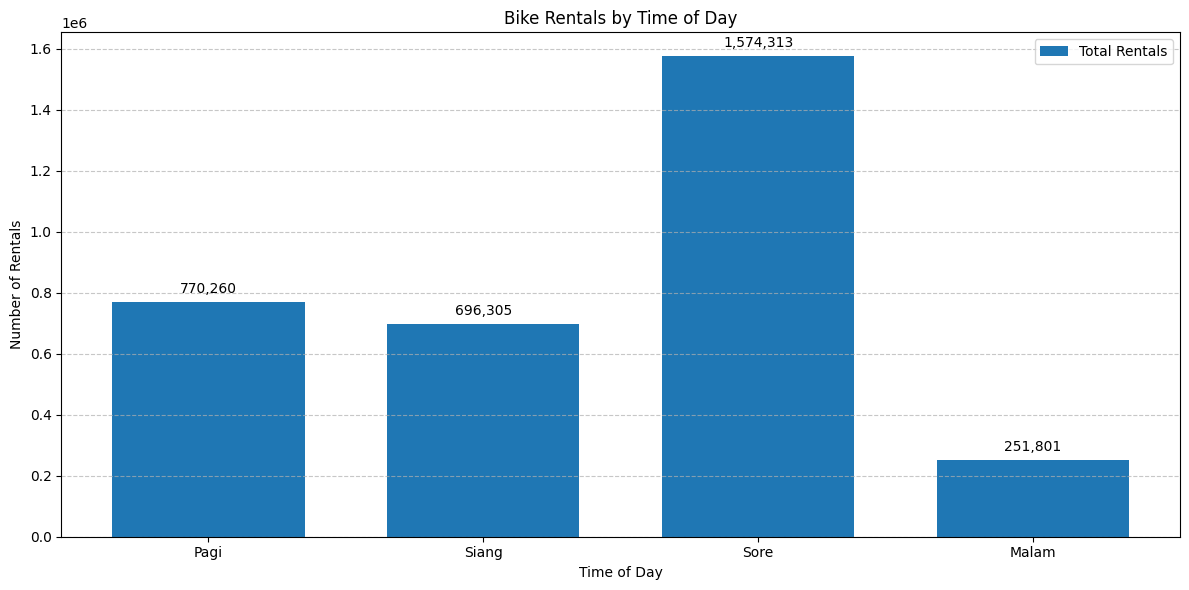

In [49]:
# Mengatur ukuran figure
plt.figure(figsize=(12, 6))

time_order = ['Pagi', 'Siang', 'Sore', 'Malam'] 
time_analysis['time_of_day'] = pd.Categorical(time_analysis['time_of_day'], 
                                            categories=time_order, 
                                            ordered=True)
time_analysis = time_analysis.sort_values('time_of_day')

# Memasukan data untuk plotting
seasons = time_analysis['time_of_day']
total_rentals = time_analysis[('cnt', 'sum')]

# Membuat X untuk posisi bar
x = range(len(seasons))
width = 0.7  # Define width for the bars

plt.bar(x, total_rentals, width=width, label='Total Rentals')

# Menambahkan nilai di atas setiap batang
for i, v in enumerate(total_rentals):
    plt.text(i, v + 30000, f"{v:,}", ha='center')

# Menambahkan label dan judul
plt.xlabel('Time of Day')
plt.ylabel('Number of Rentals')
plt.title('Bike Rentals by Time of Day')
plt.xticks(x, seasons)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Perentalan paling sering terjadi pada range jam sore (3 PM - 10 PM) (15 - 22), diikuti dengan range jam pagi (5 AM - 11 AM) (5 - 11)

## Conclusion

- Conclution pertanyaan 1: **Cuaca memiliki pengaruh pada tingkat perentalan, Melalui data yang kita dapatkan, kita dapat lihat bahwa 68.57% (2257952 total) dari perentalan terjadi ketika cuacanya Clear (cerah) dengan rata-rata 4876 perental, dilanjutkan dengan 30.27% (996858 total) perentalan pada cuaca Cloudy (berawan) dengan rata-rata 4035 perental, dan diakhiri dengan 1.15% (37869 total) perentalan terjadi ketika cuaca Light Percipatation (light rain/snow) dengan rata-rata 1803 perental. Dan Jika kita lihat bahwa tidak terdapat satupun perentalan yang terjadi ketika cuaca sedang Heavy Percipatation (heavy rain/snow). Hal ini menunjukan bahwa pengguna lebih memilih untuk merental sepeda pada kondisi cuaca yang baik**

- Conclution pertanyaan 2: **Hari weekend berpengaruh pada banyak perental pada kategori casual untuk meningkat. Pada kategori ini, juga terjadi peningkatan pada masa holiday. Sementara itu untuk kategori registered, ditunjukan pada hari weekend terjadi sedikit penurunan, namun selain weekend perental kategori registered terhitung meningkat, dan terbanyak terjadi pada hari weekday tepatnya hari kamis. Hal ini dapat disimpulkan bahwa rata-rata perental kategori registered menggunakan sepeda ini untuk kebutuhan berkerja/aktifitas karena meningkatnya perental pada hari weekday sementara itu untuk perental kategori casual merental sepeda dalam kepentingan relaksasi ditunjukan dengan meningkatnya perental pada hari weekend dan holiday**

- Conclution pertanyaan 3: **Dapat dilihat bahwa jam 5 sore (17 PM) merupakan jam dengan perental tertinggi pada kategori casual dan registered. Pada grafik tersebut ditunjukan juga bahwa terdapat puncak kedua yang terjadi pada jam 8 pagi (8 AM).**